#1. Identify valuable components of the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
employee = pd.read_csv("employee_data.csv")
insurance = pd.read_csv("insurance_data.csv")

insurance.info()
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [ ]:
''''
Insurance Type and Policy Details (INSURANCE_TYPE, POLICY_NUMBER, PREMIUM_AMOUNT):
Insights into the types of policies most frequently purchased can inform product strategy.
Identifying high-revenue products enables the business to focus on improving or expanding those offerings.
For instance, if "Property" insurance yields high premium amounts, the client might target marketing efforts to boost similar policies.


Customer Demographics and Risk Profiling (AGE, MARITAL_STATUS, EMPLOYMENT_STATUS, RISK_SEGMENTATION):
Customer profiles provide a basis for targeted marketing and risk assessment. Understanding age distribution,
employment status, and risk segmentation supports personalized policy recommendations and helps identify demographic segments with
lower risk profiles, leading to optimized pricing and tailored marketing strategies.

Customer-Linked Transaction Patterns (TXN_DATE_TIME, TRANSACTION_ID, CUSTOMER_ID):
Transaction timestamps and identifiers help track customer engagement and transaction frequency.
Understanding when customers are most likely to engage or make claims can support more effective service timing,
such as offering renewals or loyalty rewards during high-engagement periods.



''''

In [ ]:
employee.head(3)

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590


In [ ]:
#Agent Details (AGENT_ID, AGENT_NAME, DATE_OF_JOINING):
#This information enables tracking of agent tenure and potential correlations
#between tenure and sales performance. For example, agents with longer tenure
#may have higher client retention rates or premium values. Identifying high-performing agents by tenure can support effective training and retention programs.


#2. Define and communicate limitations of the data

In [ ]:
#check missing values in employee dataset
missing_employee_value = employee.isnull().sum()
print(missing_employee_value)

AGENT_ID                 0
AGENT_NAME               0
DATE_OF_JOINING          0
ADDRESS_LINE1            0
ADDRESS_LINE2         1021
CITY                     7
STATE                    0
POSTAL_CODE              0
EMP_ROUTING_NUMBER       0
EMP_ACCT_NUMBER          0
dtype: int64


In [ ]:
#check missing values in insurance dataset
missing_insurance_value = insurance.isnull().sum()
print(missing_insurance_value)

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2               8505
CITY                          54
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

In [ ]:
'''
Limitations of data sets includes missing values:
missing values in employee data:
address fields such as  ADDRESS_LINE2, CITY and other columns.

missing values in insurance data:
ADDRESS_LINE2, CITY, CUSTOMER_EDUCATION_LEVEL, AUTHORITY_CONTACTED, INCIDENT_CITY, VENDOR_ID.


Solution: can drop the column if it is not important and also can fill in missing values
'''


'\nLimitations of data sets includes missing values:\nmissing values in employee data:\naddress fields such as  ADDRESS_LINE2, CITY and other columns.\n\nmissing values in insurance data:\nADDRESS_LINE2, CITY, CUSTOMER_EDUCATION_LEVEL, AUTHORITY_CONTACTED, INCIDENT_CITY, VENDOR_ID.\n\n\nSolution: can drop the column if it is not important and also can fill in missing values\n'

In [ ]:
#drop address line 2 column due to high rate of null values
#drop vendor ID not useful and high rate or null values
insurance_data_cleaned = insurance.drop(columns=["ADDRESS_LINE2", "VENDOR_ID"])
employee_data_cleaned = employee.drop(columns=["ADDRESS_LINE2"])


In [ ]:
#clean up missing values in the datasets

#Fill missing 'CITY' and 'INCIDENT_CITY' in insurance_data and 'CITY" in employee data
insurance_data_cleaned['CITY'].fillna("UNKNOWN", inplace=True)
insurance_data_cleaned['INCIDENT_CITY'].fillna('UNKNOWN', inplace=True)
employee_data_cleaned['CITY'].fillna('UNKNOWN', inplace=True)

#fill in for CUSTOMER_EDUCATION_LEVEL
insurance_data_cleaned['CUSTOMER_EDUCATION_LEVEL'].fillna("UNKOWN", inplace=True)

#fill in for AUTHORITY_CONTACTED
insurance_data_cleaned["AUTHORITY_CONTACTED"].fillna("UNKNOWN", inplace=True)

insurance_cleaned = insurance_data_cleaned.isnull().sum()
employee_cleaned = employee_data_cleaned.isnull().sum()

print(insurance_cleaned)
print(employee_cleaned)



TXN_DATE_TIME               0
TRANSACTION_ID              0
CUSTOMER_ID                 0
POLICY_NUMBER               0
POLICY_EFF_DT               0
LOSS_DT                     0
REPORT_DT                   0
INSURANCE_TYPE              0
PREMIUM_AMOUNT              0
CLAIM_AMOUNT                0
CUSTOMER_NAME               0
ADDRESS_LINE1               0
CITY                        0
STATE                       0
POSTAL_CODE                 0
SSN                         0
MARITAL_STATUS              0
AGE                         0
TENURE                      0
EMPLOYMENT_STATUS           0
NO_OF_FAMILY_MEMBERS        0
RISK_SEGMENTATION           0
HOUSE_TYPE                  0
SOCIAL_CLASS                0
ROUTING_NUMBER              0
ACCT_NUMBER                 0
CUSTOMER_EDUCATION_LEVEL    0
CLAIM_STATUS                0
INCIDENT_SEVERITY           0
AUTHORITY_CONTACTED         0
ANY_INJURY                  0
POLICE_REPORT_AVAILABLE     0
INCIDENT_STATE              0
INCIDENT_C

<ipython-input-17-ba368615d1f6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance_data_cleaned['CITY'].fillna("UNKNOWN", inplace=True)
<ipython-input-17-ba368615d1f6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
#clean up dates of the two datasets

employee_data_cleaned['DATE_OF_JOINING'] = pd.to_datetime(employee_data_cleaned['DATE_OF_JOINING'])

insurance_data_cleaned['TXN_DATE_TIME'] = pd.to_datetime(insurance_data_cleaned['TXN_DATE_TIME'])
insurance_data_cleaned['POLICY_EFF_DT	'] = pd.to_datetime(insurance_data_cleaned['POLICY_EFF_DT'])



#3. Demonstrate preliminary insights

In [ ]:
insurance_data_cleaned.head(2)

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,POLICY_EFF_DT\t
0,2020-06-01,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,2015-06-23
1,2020-06-01,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,2018-04-21


<ipython-input-19-2513cf186a84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='INSURANCE_TYPE', y='CLAIM_AMOUNT', data=insurance_data_cleaned, palette = "Paired")


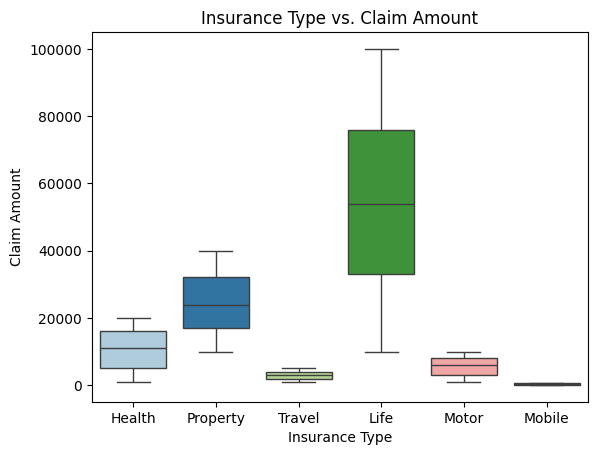

In [ ]:
#Insurance Type vs Claim Amount

sns.boxplot(x='INSURANCE_TYPE', y='CLAIM_AMOUNT', data=insurance_data_cleaned, palette = "Paired")

plt.title('Insurance Type vs. Claim Amount')
plt.xlabel('Insurance Type')
plt.ylabel('Claim Amount')

plt.show()


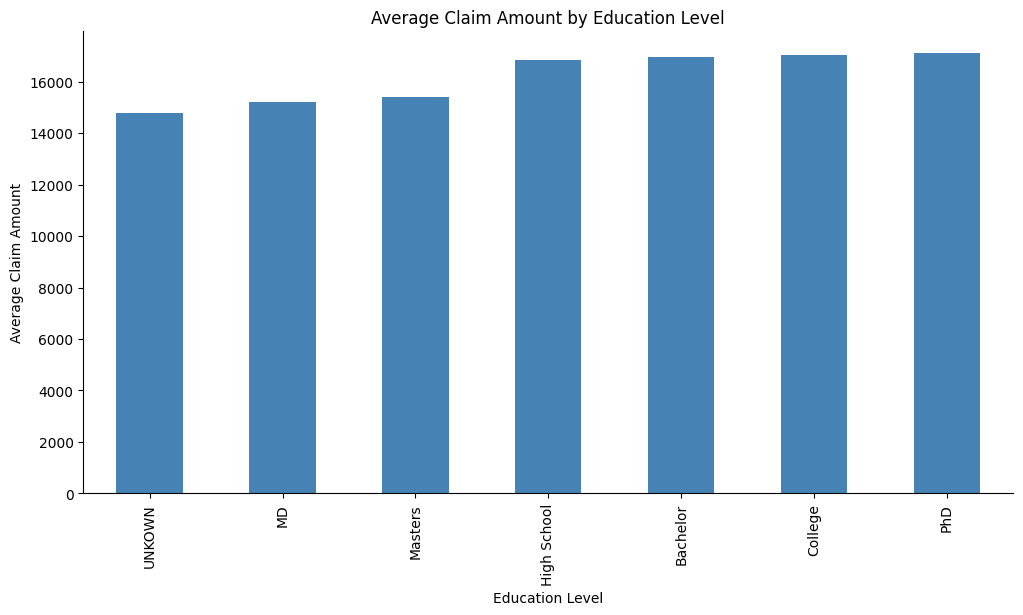

In [ ]:
#Average Claim Amount by Education Level

avg_claim_by_education = insurance_data_cleaned.groupby('CUSTOMER_EDUCATION_LEVEL')['CLAIM_AMOUNT'].mean()

avg_claim_by_education = avg_claim_by_education.sort_values(ascending=True)


fig, ax = plt.subplots(figsize=(12, 6))
avg_claim_by_education.plot(ax=ax, kind="bar", stacked=True, color ="steelblue")


plt.title('Average Claim Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Claim Amount')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)


plt.show()




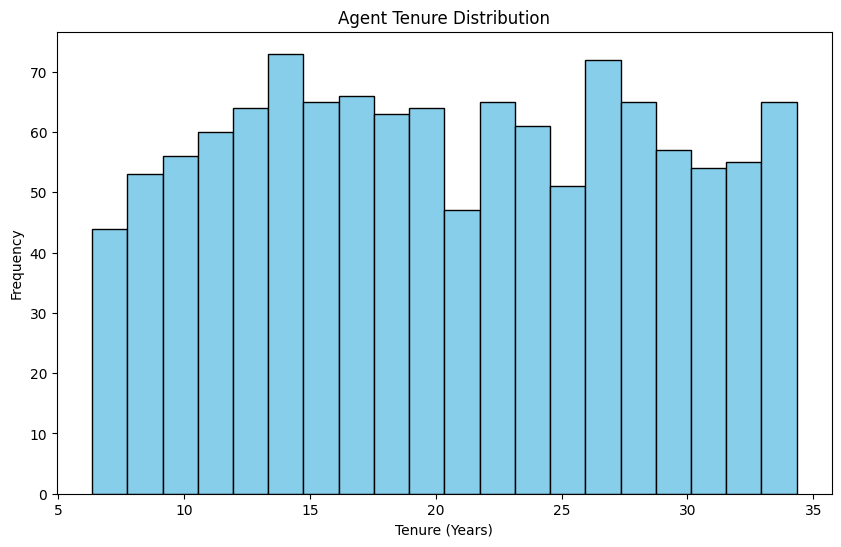

In [ ]:
#Agent tenure distribution

current_date = pd.to_datetime('today')
employee_data_cleaned['TENURE_YEARS'] = (current_date - employee_data_cleaned['DATE_OF_JOINING']).dt.days / 365.25

# Step 2: Plotting the Employee Tenure Distribution as a Histogram
plt.figure(figsize=(10, 6))
plt.hist(employee_data_cleaned['TENURE_YEARS'], bins=20, color='skyblue', edgecolor='black')

plt.title('Agent Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')

plt.show()


In [ ]:
insurance_data_cleaned.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TXN_DATE_TIME             10000 non-null  datetime64[ns]
 1   TRANSACTION_ID            10000 non-null  object        
 2   CUSTOMER_ID               10000 non-null  object        
 3   POLICY_NUMBER             10000 non-null  object        
 4   POLICY_EFF_DT             10000 non-null  object        
 5   LOSS_DT                   10000 non-null  object        
 6   REPORT_DT                 10000 non-null  object        
 7   INSURANCE_TYPE            10000 non-null  object        
 8   PREMIUM_AMOUNT            10000 non-null  float64       
 9   CLAIM_AMOUNT              10000 non-null  int64         
 10  CUSTOMER_NAME             10000 non-null  object        
 11  ADDRESS_LINE1             10000 non-null  object        
 12  CITY               

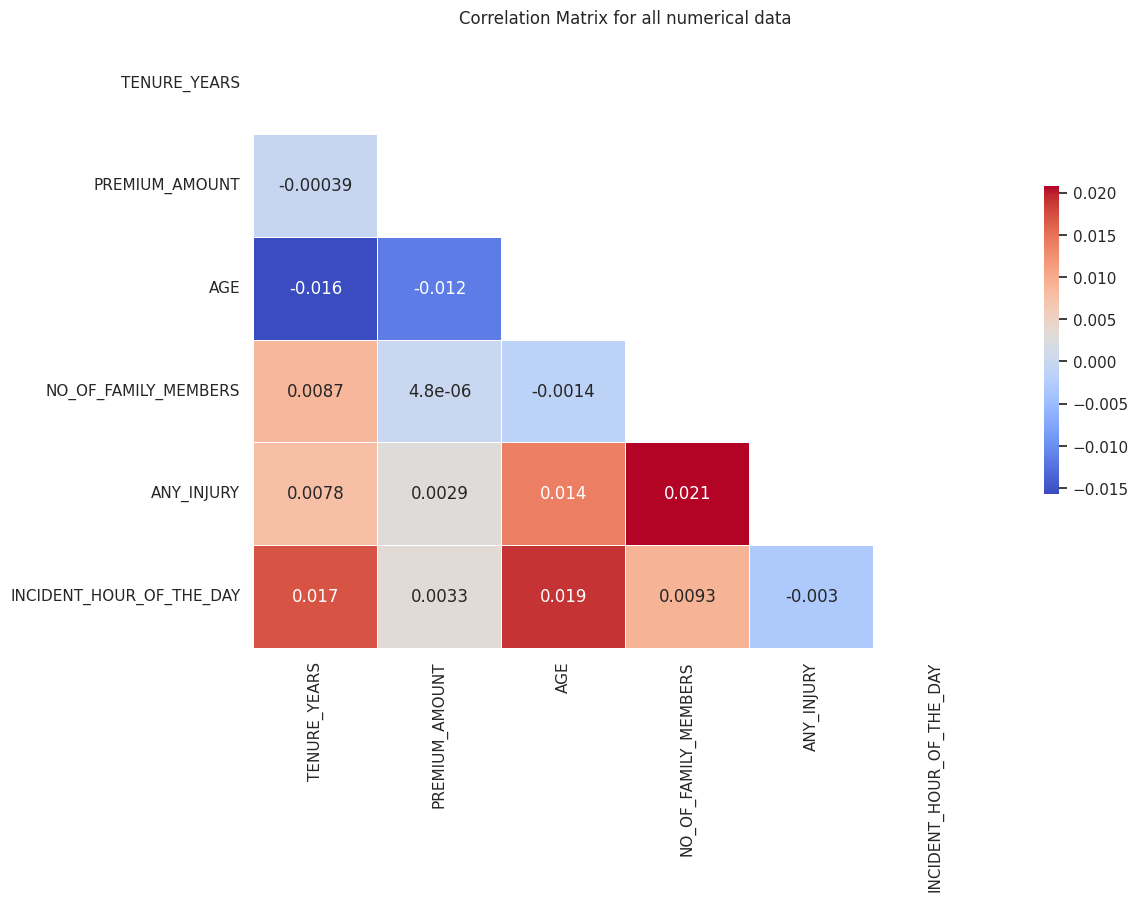

In [ ]:
import numpy as np
#correlation heatmap between all quantatative data in both datasets

merged_data = pd.merge(employee_data_cleaned, insurance_data_cleaned, on='AGENT_ID', how='inner')

# Select only numeric columns from the insurance data for correlation calculation
numeric_data = merged_data[["TENURE_YEARS", "PREMIUM_AMOUNT", "AGE", "NO_OF_FAMILY_MEMBERS", "ANY_INJURY", "INCIDENT_HOUR_OF_THE_DAY" ]]

# Plot the correlation matrix
sns.set_theme(style="white")
corr = numeric_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for all numerical data')
plt.show()



In [ ]:
merged_data.head()

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1_x,CITY_x,STATE_x,POSTAL_CODE_x,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,TENURE_YEARS,...,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,POLICY_EFF_DT\t
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,Waterbury Center,VT,5677,34584958,HKUN51252328472585,31.394935,...,College,A,Minor Loss,UNKNOWN,0,1,FL,Lynn Haven,4,2011-01-31
1,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,Waterbury Center,VT,5677,34584958,HKUN51252328472585,31.394935,...,Bachelor,A,Total Loss,Ambulance,0,1,MD,Glen Burnie,5,2019-09-26
2,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,Waterbury Center,VT,5677,34584958,HKUN51252328472585,31.394935,...,Bachelor,A,Major Loss,UNKNOWN,1,1,MD,Arnold,6,2015-10-02
3,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,Waterbury Center,VT,5677,34584958,HKUN51252328472585,31.394935,...,Masters,A,Total Loss,Ambulance,1,1,AR,Fayetteville,18,2014-01-23
4,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,Waterbury Center,VT,5677,34584958,HKUN51252328472585,31.394935,...,Bachelor,A,Minor Loss,Police,1,1,OK,Oklahoma City,18,2013-02-17


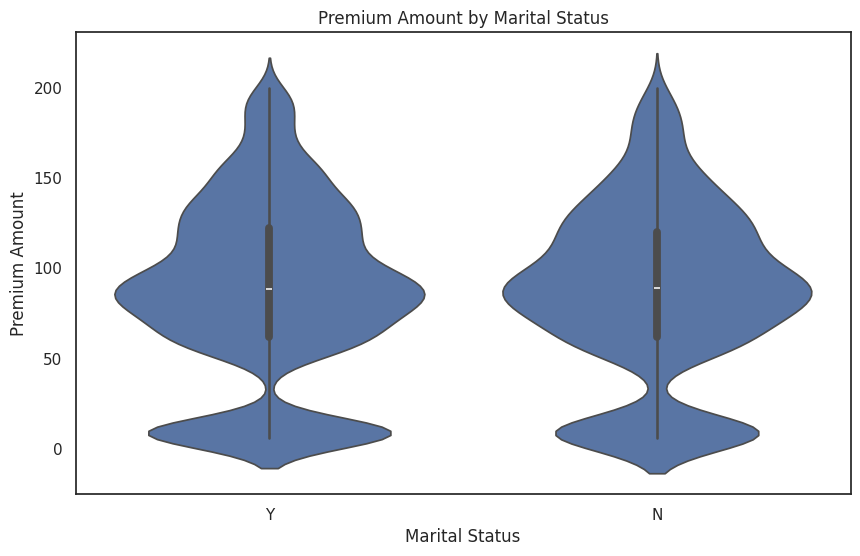

In [ ]:
#Marital Status and Premium Amount

plt.figure(figsize=(10, 6))

sns.violinplot(data=merged_data, x='MARITAL_STATUS', y='PREMIUM_AMOUNT')
plt.title('Premium Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Premium Amount')
plt.show()

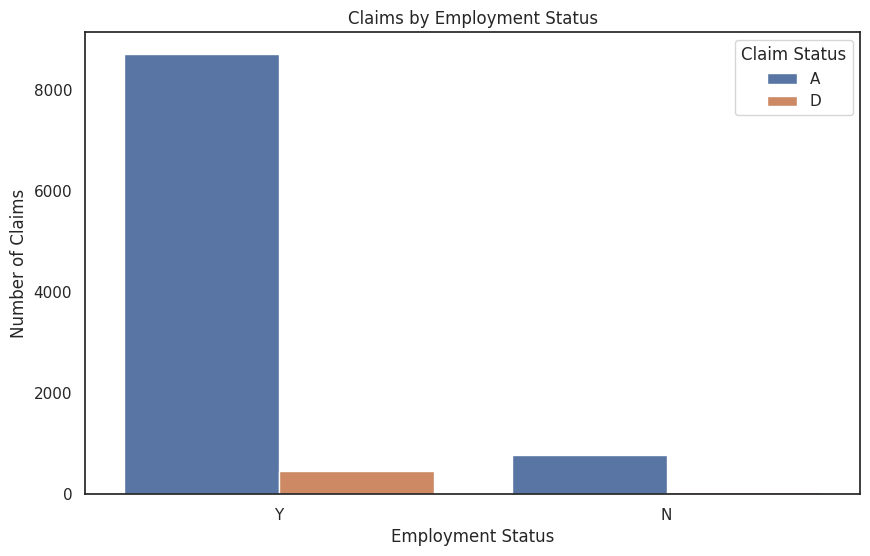

In [ ]:
#Employment Status and Claim count with Claim status

plt.figure(figsize=(10, 6))

sns.countplot(data=merged_data, x='EMPLOYMENT_STATUS', hue='CLAIM_STATUS')


plt.title('Claims by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Claims')
plt.legend(title='Claim Status')
plt.show()